In [78]:
#importing the required libraries
import pandas as pd
import string
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from wordcloud import WordCloud
from nltk import ngrams
import nltk

In [79]:
#Loading the data
data = pd.read_csv(r"C:\Users\bages\OneDrive\Desktop\technical_skills_assessment_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   urn          166 non-null    object
 1   text         166 non-null    object
 2   title        106 non-null    object
 3   postedAtISO  166 non-null    object
 4   authorType   166 non-null    object
 5   authorName   166 non-null    object
 6   numLikes     166 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 9.2+ KB


In [80]:
#reading the data
data.head()

,urn,text,title,postedAtISO,authorType,authorName,numLikes
0,urn:li:activity:7202637708366651392,Abstract: Poly (ADP-ribose) polymerase (PARP) ...,Poly (ADP-ribose) polymerase (PARP) inhibitors...,2024-06-01T11:50:48.212Z,Person,Robert Kargbo,42
1,urn:li:activity:7230349310503100416,Small biotechs versus large pharma: Who drives...,Small biotechs versus large pharma: Who drives...,2024-08-16T23:06:49.018Z,Person,Cheryl Madsen,45
2,urn:li:activity:7176511426058944513,NEW PARP-1 INHIBITORS THROUGH A DNA-ENCODED LI...,NaN,2024-03-21T09:34:17.107Z,Person,Giuseppe Giannini,1
3,urn:li:activity:7218556414527434754,𝗔 𝗖𝗼𝗺𝗽𝗿𝗲𝗵𝗲𝗻𝘀𝗶𝘃𝗲 𝗣𝗗𝗙 𝗗𝗮𝘁𝗮 𝗚𝘂𝗶𝗱𝗲 𝐏𝐀𝐑𝐏 𝐈𝐧𝐡𝐢𝐛𝐢𝐭𝐨𝐫\...,Which PARP inhibitor application area do you f...,2024-07-15T10:06:03.516Z,Person,Shweta Pawar,2
4,urn:li:activity:7149292108628000769,ASCO-SSO Joint Guidelines on Germline Testing ...,NaN,2024-01-06T06:54:26.121Z,Person,Dr. Avik Kumar Mukherjee Ph.D.,50


In [81]:
#Loading the data shape
data.shape 

(166, 7)

In [82]:
#Check for duplication in data
if data.duplicated().sum() == 0:
    print('No, There aren\'t duplicate rows in the dataset.')
else:
    print(f'Yes, There are {data.duplicated().sum()} duplicate rows in the dataset.Deleting the duplicate rows\n')
    data.drop_duplicates(inplace=True)#deleting the duplicates
    print(f'After deleting the duplicated rows in dataset.\n Total rows and column : ' ,  {data.shape}) # (rows, columns)

#Checking for missing values
if data.isna().sum().sum() > 0:
    print(f'Unfortunately, there are {data.isna().sum().sum()} missing values in the dataset. Dropping rows with missing values.\n')
    data.dropna(inplace=True)#dropping the missing values
    print(f'After deleting the missing rows in dataset.\n Total rows and column : ' ,  {data.shape})
else:
    print('Fortunately, there aren\'t any missing values in the dataset.')
    print(f'Total rows and column : ' , {data.shape})#printing the updated data
        

Yes, There are 66 duplicate rows in the dataset.Deleting the duplicate rows

After deleting the duplicated rows in dataset.
 Total rows and column :  {(100, 7)}
Unfortunately, there are 30 missing values in the dataset. Dropping rows with missing values.

After deleting the missing rows in dataset.
 Total rows and column :  {(70, 7)}


In [83]:
#Creating a normalizing function
def normalize_text(text, use_stemming=False, use_lemmatization=False, remove_stopwords=False):
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    # Converting to lowercase
    text = text.lower()
    
    # Removing punctuation  and whitespaces
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    
    # Tokenizing the text
    words = text.split()
    
    # Remove stop words
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
    
    # Stemming or Lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    elif use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    normalized_text = ' '.join(words)
    
    return normalized_text

for column in data.select_dtypes(include=[object]).columns:
    data[column] = data[column].apply(
        lambda x: normalize_text(x, use_stemming=True, remove_stopwords=True)
    )

In [84]:
data.head()

,urn,text,title,postedAtISO,authorType,authorName,numLikes
0,urnliact,abstract poli adpribos polymeras parp consid e...,poli adpribos polymeras parp inhibitor antican...,tz,person,robert kargbo,42
1,urnliact,small biotech versu larg pharma drive firstinc...,small biotech versu larg pharma drive firstinc...,tz,person,cheryl madsen,45
3,urnliact,𝗔 𝗖𝗼𝗺𝗽𝗿𝗲𝗵𝗲𝗻𝘀𝗶𝘃𝗲 𝗣𝗗𝗙 𝗗𝗮𝘁𝗮 𝗚𝘂𝗶𝗱𝗲 𝐏𝐀𝐑𝐏 𝐈𝐧𝐡𝐢𝐛𝐢𝐭𝐨𝐫 ...,parp inhibitor applic area find promis,tz,person,shweta pawar,2
6,urnliact,guess first paper postdoc publish yesterday sh...,aryl hydrocarbon receptor suppress stingmedi t...,tz,person,jeffrey c martin phd,176
8,urnliact,💡 excit breakthrough ovarian cancer treatment ...,revolution ovarian cancer treatment adapt parp...,tz,compani,carcinotech ltd,14


In [85]:
# Calculating TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data.select_dtypes(include=[object]).fillna('').agg(' '.join, axis=1))

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Displaying the TF-IDF DataFrame
print("TF-IDF Scores DataFrame:")
print(tfidf_df.head())

# Analyzing significant terms (terms with the highest mean TF-IDF scores)
mean_tfidf_scores = tfidf_df.mean().sort_values(ascending=False)
print("\nMost Significant Terms based on Mean TF-IDF Scores:")
print(mean_tfidf_scores.head(10))

# Identifying significant terms in each document (top N terms per document)
def get_top_n_terms(tfidf_df, n=5):
    return tfidf_df.apply(lambda x: x.nlargest(n).index.tolist(), axis=1)

top_terms_per_document = get_top_n_terms(tfidf_df, n=5)

# Adding the top terms to the original DataFrame
data['top_terms'] = top_terms_per_document

# Display the updated DataFrame
print("\nUpdated DataFrame with Top Terms:")
print(data[['top_terms']].head())

TF-IDF Scores DataFrame:
      abbvi  abbvie  aberr  aberrantli       abl   absolut  abstract  accept  \
0  0.000000     0.0    0.0    0.000000  0.000000  0.000000  0.090961     0.0   
1  0.000000     0.0    0.0    0.000000  0.000000  0.067691  0.000000     0.0   
2  0.086585     0.0    0.0    0.000000  0.000000  0.000000  0.000000     0.0   
3  0.000000     0.0    0.0    0.039084  0.033155  0.000000  0.000000     0.0   
4  0.000000     0.0    0.0    0.000000  0.000000  0.000000  0.000000     0.0   

   access  accessori  ...  𝗥𝗲𝗽𝗼𝗿𝘁  𝗦𝗮𝗺𝗽𝗹𝗲  𝗧𝗵𝗲  𝘾𝙤𝙧𝙥𝙤𝙧𝙖𝙩𝙚        𝙄𝙙      𝙈𝙖𝙞𝙡  \
0     0.0        0.0  ...     0.0     0.0  0.0   0.000000  0.000000  0.000000   
1     0.0        0.0  ...     0.0     0.0  0.0   0.000000  0.000000  0.000000   
2     0.0        0.0  ...     0.0     0.0  0.0   0.091874  0.091874  0.091874   
3     0.0        0.0  ...     0.0     0.0  0.0   0.000000  0.000000  0.000000   
4     0.0        0.0  ...     0.0     0.0  0.0   0.000000  0.000000  0.000000   

      𝙌

# EDA

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 162
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   urn          70 non-null     object
 1   text         70 non-null     object
 2   title        70 non-null     object
 3   postedAtISO  70 non-null     object
 4   authorType   70 non-null     object
 5   authorName   70 non-null     object
 6   numLikes     70 non-null     int64 
 7   top_terms    34 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.9+ KB


In [87]:
data[['text' , 'authorType' , 'title']].describe()

,text,authorType,title
count,70,70,70
unique,44,2,68
top,innov manag digitalmarket technolog creativ fu...,compani,parp inhibitor applic area find promis
freq,22,43,2


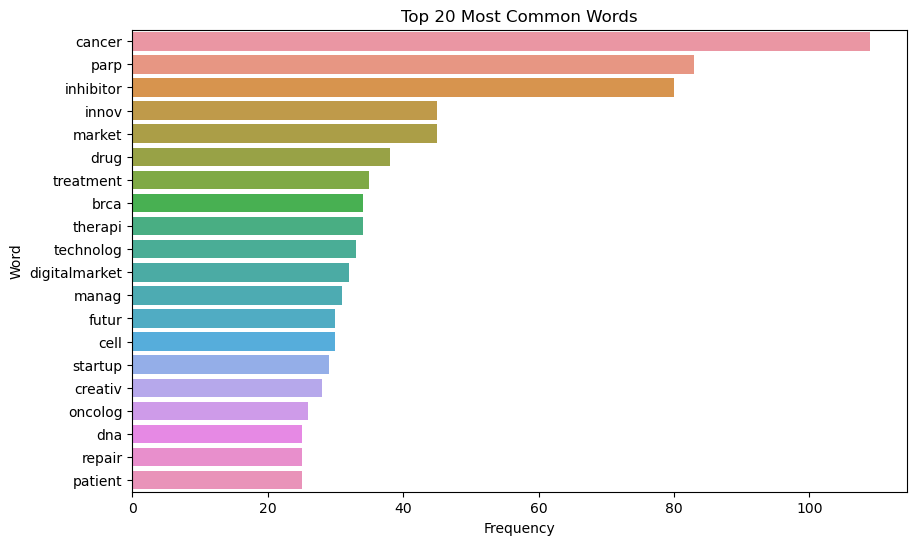

In [103]:
# Additional imports for visualizations and correlations
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#Word Frequency Distribution
def plot_word_frequency(data, top_n=20):
    
    # Combining all text into a single string
    all_words = ' '.join(data['text']).split()
    
    # Counting the frequency of each word
    word_freq = Counter(all_words)
    
    # Getting the top N most common words
    most_common_words = word_freq.most_common(top_n)
    
    # Creating a DataFrame from the word frequencies
    word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
    
    # Ploting the word frequency
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=word_freq_df)
    plt.title(f'Top {top_n} Most Common Words')
    plt.show()

    
plot_word_frequency(data)




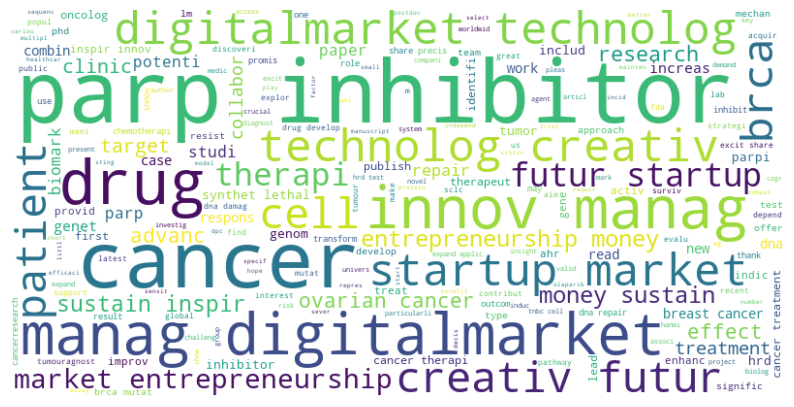


Top 10 Bi-grams:
                       N-gram  Frequency
0           (parp, inhibitor)         69
1              (innov, manag)         29
2      (manag, digitalmarket)         28
3  (digitalmarket, technolog)         27
4        (technolog, creativ)         27
5           (startup, market)         27
6            (creativ, futur)         25
7            (futur, startup)         25
8  (market, entrepreneurship)         23
9   (entrepreneurship, money)         23


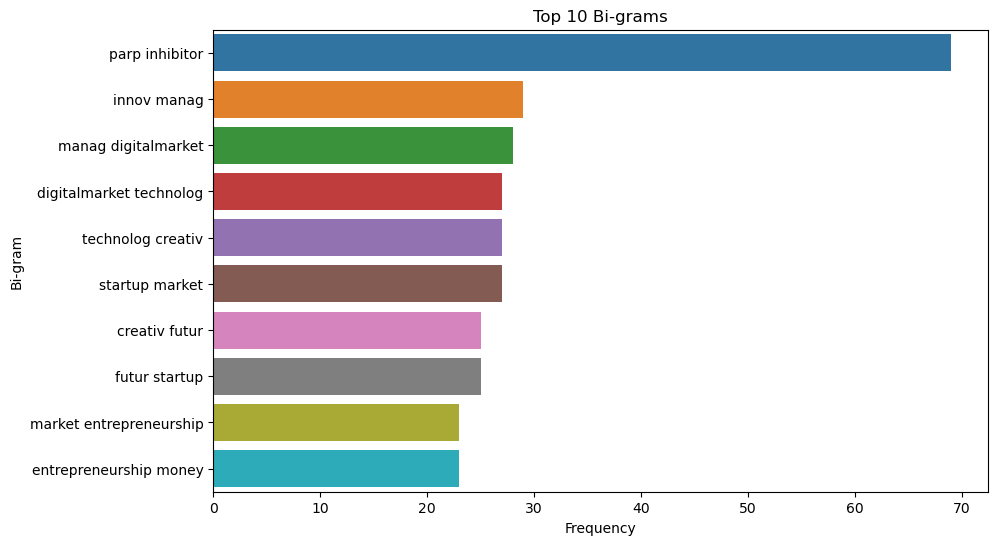


Top 10 Tri-grams:
                                N-gram  Frequency
0        (innov, manag, digitalmarket)         28
1    (manag, digitalmarket, technolog)         27
2  (digitalmarket, technolog, creativ)         27
3          (technolog, creativ, futur)         25
4            (creativ, futur, startup)         25
5             (futur, startup, market)         25
6  (startup, market, entrepreneurship)         23
7    (market, entrepreneurship, money)         23
8   (entrepreneurship, money, sustain)         23
9             (money, sustain, inspir)         22


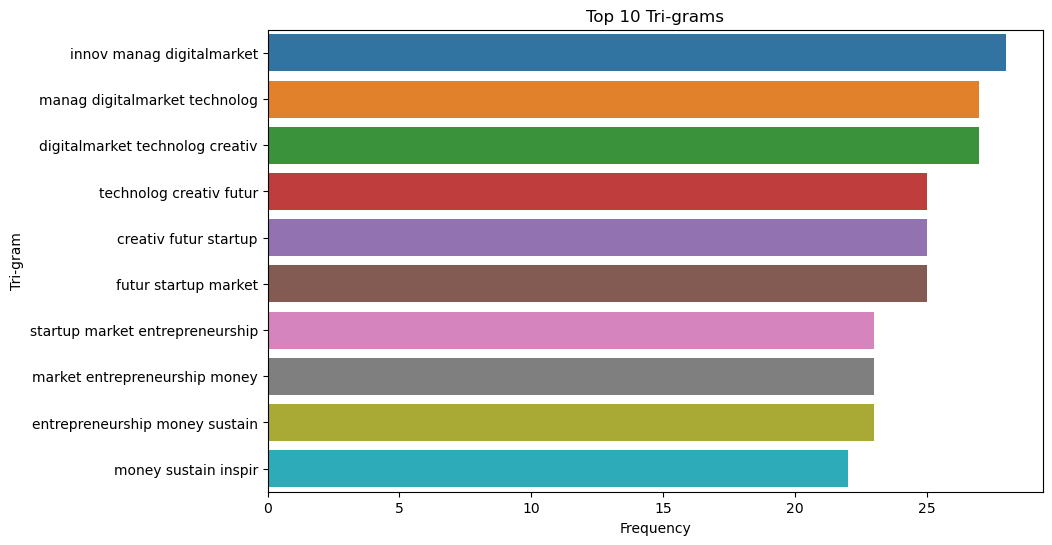

In [104]:
# Additional imports for WordCloud and n-grams analysis
from wordcloud import WordCloud
from nltk import ngrams
import nltk


# Step 2: Word Cloud for Visualizing Most Common Words
def generate_word_cloud(data):
    all_words = ' '.join(data['text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axis
    plt.show()

# Call the function to generate the word cloud
generate_word_cloud(data)

# Step 3: N-grams Analysis (Bi-grams and Tri-grams)
def get_top_n_ngrams(corpus, ngram_range=(2, 2), top_n=10):
    # Tokenize the words
    words = nltk.word_tokenize(' '.join(corpus))
    
    # Generate n-grams
    n_grams = ngrams(words, ngram_range[1])
    
    # Count n-gram frequencies
    n_gram_freq = Counter(n_grams)
    
    # Get the top N most common n-grams
    most_common_n_grams = n_gram_freq.most_common(top_n)
    
    # Create a DataFrame for visualization
    n_gram_df = pd.DataFrame(most_common_n_grams, columns=['N-gram', 'Frequency'])
    
    return n_gram_df

# Generate top bi-grams (2-grams)
bi_grams_df = get_top_n_ngrams(data['text'], ngram_range=(2, 2), top_n=10)
print("\nTop 10 Bi-grams:")
print(bi_grams_df)

# Plotting the bi-grams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y=bi_grams_df['N-gram'].apply(lambda x: ' '.join(x)), data=bi_grams_df)
plt.title('Top 10 Bi-grams')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.show()

# Generate top tri-grams (3-grams)
tri_grams_df = get_top_n_ngrams(data['text'], ngram_range=(3, 3), top_n=10)
print("\nTop 10 Tri-grams:")
print(tri_grams_df)

# Plotting the tri-grams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y=tri_grams_df['N-gram'].apply(lambda x: ' '.join(x)), data=tri_grams_df)
plt.title('Top 10 Tri-grams')
plt.xlabel('Frequency')
plt.ylabel('Tri-gram')
plt.show()
